# TransactionCensusDB

### Understand the Data
#### Online Retail Data
Columns:
1. Country: Canada (filtered).
2. CustomerID: Unique identifier for customers.
3. Sum of Quantity: Total quantity purchased by each customer.
4. Sum of UnitPrice: Total unit price for each customer.
5. TotalSpent: Total amount spent by each customer.
6. TotalPurchase: Total number of purchases by each customer.
7. FirstPurchaseDate: Date of the first purchase.
8. LastPurchaseDate: Date of the last purchase.

#### Census Data
Columns:
1. Age Characteristics: Distribution of age groups (e.g., 0–14 years, 15–64 years, 65+ years).
2. Income Characteristics: Average after-tax income and total income for men and women.
3. Industry Classification: Employment distribution across industries (e.g., retail trade, healthcare, manufacturing).
4. Household Characteristics: Housing types, ownership, and spending on shelter costs.
5. Language Spoken: Distribution of languages spoken at home.
6. Commuting Patterns: Main modes of commuting (e.g., car, public transit, walking).

In [1]:
# Import libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # For regression modeling
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

## Load Dataset

In [2]:
# Load Dataset 1: Online_Retail_Transaction_clean
online_retail_df = pd.read_csv(
    'C:/Users/femij/Downloads/Online_Retail_Transaction_clean.csv',
    low_memory=False
)

# Load Dataset 2: Census_Profile_2021_clean
census_df = pd.read_csv('C:/Users/femij/Downloads/Census_Profile_2021_clean.csv')

## Explore the Online Retail Dataset

In [3]:
# Filter Online Retail Data for Canada
online_retail_canada = online_retail_df[online_retail_df['Country'] == 'Canada']

# Display the first few rows of the filtered data
print("Online Retail Data for Canada:")
print(online_retail_canada.head())

Online Retail Data for Canada:
       InvoiceNo StockCode                        Description  Quantity  \
490966    559557     21232     STRAWBERRY CERAMIC TRINKET BOX        12   
490967    559557     21892  TRADITIONAL WOODEN CATCH CUP GAME        12   
491027    564428     21993         FLORAL FOLK STATIONERY SET        12   
493556    557322     22561        WOODEN SCHOOL COLOURING SET        12   
493557    557322     23191       BUNDLE OF 3 RETRO NOTE BOOKS        12   

             InvoiceDate  UnitPrice  CustomerID Country  
490966  2011-07-11 10:33       1.25     17444.0  Canada  
490967  2011-07-11 10:33       1.25     17444.0  Canada  
491027  2011-08-25 11:27       1.25     17844.0  Canada  
493556   2011-06-20 9:04       1.65     17444.0  Canada  
493557   2011-06-20 9:04       1.65     17444.0  Canada  


In [4]:
# Check for missing values
print("Missing Values in Online Retail Data:")
print(online_retail_canada.isnull().sum())

Missing Values in Online Retail Data:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [5]:
# Summary statistics
print("Summary Statistics for Online Retail Data:")
print(online_retail_canada.describe())

Summary Statistics for Online Retail Data:
         Quantity   UnitPrice    CustomerID
count  151.000000  151.000000    151.000000
mean    18.298013    6.030331  17321.079470
std     46.682587   44.713675    521.471208
min      1.000000    0.100000  15388.000000
25%      6.000000    0.830000  17444.000000
50%     12.000000    1.650000  17444.000000
75%     20.000000    2.950000  17444.000000
max    504.000000  550.940000  17844.000000


In [6]:
# Summary statistics
print("Summary Information for Online Retail Data:")
print(online_retail_canada.info())

Summary Information for Online Retail Data:
<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 490966 to 530100
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    151 non-null    object 
 1   StockCode    151 non-null    object 
 2   Description  151 non-null    object 
 3   Quantity     151 non-null    int64  
 4   InvoiceDate  151 non-null    object 
 5   UnitPrice    151 non-null    float64
 6   CustomerID   151 non-null    float64
 7   Country      151 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.6+ KB
None


## Data Preparation

In [9]:
# Calculate 'TotalAmount' as Quantity * UnitPrice
online_retail_canada.loc[:, 'TotalAmount'] = online_retail_canada['Quantity'] * online_retail_canada['UnitPrice']

# Verify the updated DataFrame to check 'TotalAmount'
print(online_retail_canada[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'TotalAmount']].head())

       InvoiceNo StockCode                        Description  Quantity  \
490966    559557     21232     STRAWBERRY CERAMIC TRINKET BOX        12   
490967    559557     21892  TRADITIONAL WOODEN CATCH CUP GAME        12   
491027    564428     21993         FLORAL FOLK STATIONERY SET        12   
493556    557322     22561        WOODEN SCHOOL COLOURING SET        12   
493557    557322     23191       BUNDLE OF 3 RETRO NOTE BOOKS        12   

        UnitPrice  TotalAmount  
490966       1.25         15.0  
490967       1.25         15.0  
491027       1.25         15.0  
493556       1.65         19.8  
493557       1.65         19.8  


In [11]:
# Convert 'InvoiceDate' to datetime type (if it's not already)
online_retail_canada['InvoiceDate'] = pd.to_datetime(online_retail_canada['InvoiceDate'], errors='coerce')

# Extract the month from 'InvoiceDate' and create a 'Month' column
online_retail_canada['Month'] = online_retail_canada['InvoiceDate'].dt.to_period('M')

### Monthly Sales Trends in Canada

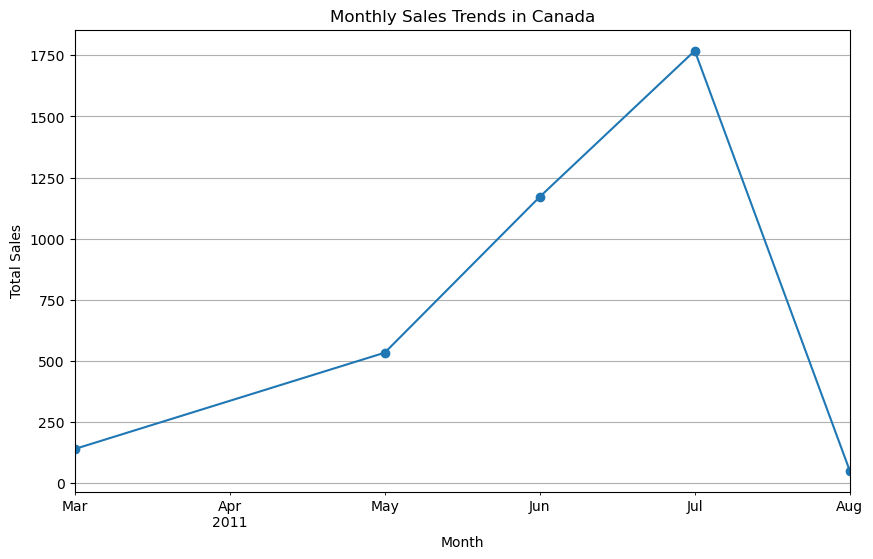

In [12]:
# Group by 'Month' and calculate total sales
monthly_sales_canada = online_retail_canada.groupby('Month')['TotalAmount'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales_canada.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends in Canada')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Top Selling Products in Canada

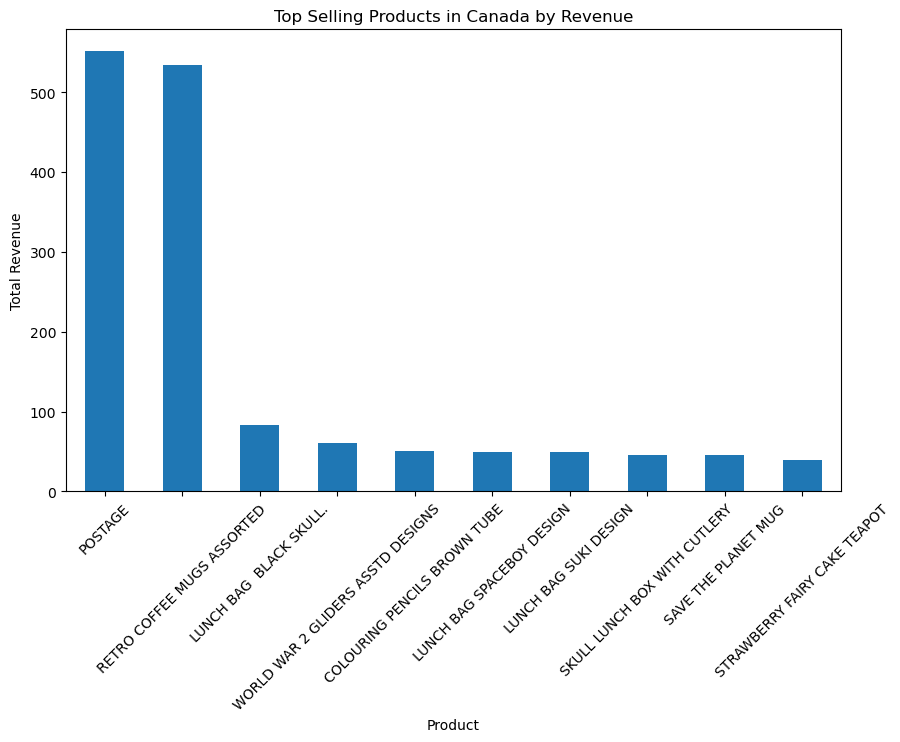

In [13]:
# Group by Product and calculate total revenue
top_products_canada = online_retail_canada.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)

# Plot the top-selling products
plt.figure(figsize=(10, 6))
top_products_canada.plot(kind='bar')
plt.title('Top Selling Products in Canada by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## Exploring the Census Data

In [14]:
# Display the first few rows of the census data
print("Census Data for Canada:")
print(census_df.head())

# Check column names
print(census_df.columns)

Census Data for Canada:
                       Topic  \
0  Household characteristics   
1  Household characteristics   
2  Household characteristics   
3  Household characteristics   
4  Household characteristics   

                                      Characteristic       Total  Men  Women  
0  Total - Private households by tenure - 25% sam...  14978940.0  NaN    NaN  
1                                              Owner   9955975.0  NaN    NaN  
2                                             Renter   4953840.0  NaN    NaN  
3  Dwelling provided by the local government, Fir...     69130.0  NaN    NaN  
4  Total - Occupied private dwellings by condomin...  14978940.0  NaN    NaN  
Index(['Topic', 'Characteristic', 'Total', 'Men', 'Women'], dtype='object')


In [15]:
# Summary statistics
print("Summary Information for Online Retail Data:")
print(census_df.info())

Summary Information for Online Retail Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Topic           2631 non-null   object 
 1   Characteristic  2629 non-null   object 
 2   Total           2631 non-null   float64
 3   Men             2401 non-null   float64
 4   Women           2401 non-null   float64
dtypes: float64(3), object(2)
memory usage: 102.9+ KB
None


In [16]:
# Check for missing values in Census Data
print("Missing Values in Census Data for Canada:")
print(census_df.isnull().sum())

Missing Values in Census Data for Canada:
Topic               0
Characteristic      2
Total               0
Men               230
Women             230
dtype: int64


In [17]:
# Fill missing values in 'Characteristic' with 'Unknown'
census_df['Characteristic'] = census_df['Characteristic'].fillna('Unknown')

In [18]:
# Fill missing values in 'Men' and 'Women' with 0
census_df['Men'] = census_df['Men'].fillna(0)
census_df['Women'] = census_df['Women'].fillna(0)

In [19]:
# Display the cleaned data
print("Census Data for Canada:")
print(census_df.head())

Census Data for Canada:
                       Topic  \
0  Household characteristics   
1  Household characteristics   
2  Household characteristics   
3  Household characteristics   
4  Household characteristics   

                                      Characteristic       Total  Men  Women  
0  Total - Private households by tenure - 25% sam...  14978940.0  0.0    0.0  
1                                              Owner   9955975.0  0.0    0.0  
2                                             Renter   4953840.0  0.0    0.0  
3  Dwelling provided by the local government, Fir...     69130.0  0.0    0.0  
4  Total - Occupied private dwellings by condomin...  14978940.0  0.0    0.0  


### Integrate the Datasets
Since the Census Data represents a single year (2021) and doesn’t have a time-based component, we’ll integrate it with the Online Retail Data by aggregating the retail data to match the census data's granularity.

In [28]:
# Calculate TotalAmount by multiplying Quantity by UnitPrice
online_retail_canada['TotalAmount'] = online_retail_canada['Quantity'] * online_retail_df['UnitPrice']

# Aggregate online retail data by product category (Description)
online_retail_agg = online_retail_df.groupby('Description').agg({
    'TotalAmount': 'sum',  # Sum of 'TotalAmount'
    'Quantity': 'sum'      # Sum of 'Quantity'
}).reset_index()

# Display the aggregated data
print("Aggregated Online Retail Data:")
print(online_retail_agg)

Aggregated Online Retail Data:
                         Description  TotalAmount  Quantity
0      4 PURPLE FLOCK DINNER CANDLES       285.70       142
1      50'S CHRISTMAS GIFT BAG LARGE      2341.13      1913
2                  DOLLY GIRL BEAKER      2877.50      2444
3        I LOVE LONDON MINI BACKPACK      1624.02       388
4        I LOVE LONDON MINI RUCKSACK         4.15         1
...                              ...          ...       ...
4191     wrongly marked carton 22804         0.00      -256
4192    wrongly marked. 23343 in box         0.00     -3100
4193    wrongly sold (22719) barcode         0.00       170
4194            wrongly sold as sets         0.00      -600
4195               wrongly sold sets         0.00      -975

[4196 rows x 3 columns]


In [25]:
# Aggregate census data to get total population, men, and women
total_population = census_df['Total'].sum()
total_men = census_df['Men'].sum()
total_women = census_df['Women'].sum()

print(f"Total Population: {total_population}")
print(f"Total Men: {total_men}")
print(f"Total Women: {total_women}")

Total Population: 5537437599.011
Total Men: 2300088390.8
Total Women: 2340113782.8999996


### Merge the Datasets

In [29]:
# Add demographic context to the online retail data
online_retail_canada['TotalPopulation'] = total_population
online_retail_canada['TotalMen'] = total_men
online_retail_canada['TotalWomen'] = total_women

# Display the updated data
print("Online Retail Data with Demographic Context:")
print(online_retail_canada.head())

Online Retail Data with Demographic Context:
       InvoiceNo StockCode                        Description  Quantity  \
490966    559557     21232     STRAWBERRY CERAMIC TRINKET BOX        12   
490967    559557     21892  TRADITIONAL WOODEN CATCH CUP GAME        12   
491027    564428     21993         FLORAL FOLK STATIONERY SET        12   
493556    557322     22561        WOODEN SCHOOL COLOURING SET        12   
493557    557322     23191       BUNDLE OF 3 RETRO NOTE BOOKS        12   

               InvoiceDate  UnitPrice  CustomerID Country  TotalAmount  \
490966 2011-07-11 10:33:00       1.25     17444.0  Canada         15.0   
490967 2011-07-11 10:33:00       1.25     17444.0  Canada         15.0   
491027 2011-08-25 11:27:00       1.25     17844.0  Canada         15.0   
493556 2011-06-20 09:04:00       1.65     17444.0  Canada         19.8   
493557 2011-06-20 09:04:00       1.65     17444.0  Canada         19.8   

          Month  TotalPopulation      TotalMen    TotalWome

### Perform Advanced Analytics

#### Analyze Sales by Demographic Factors

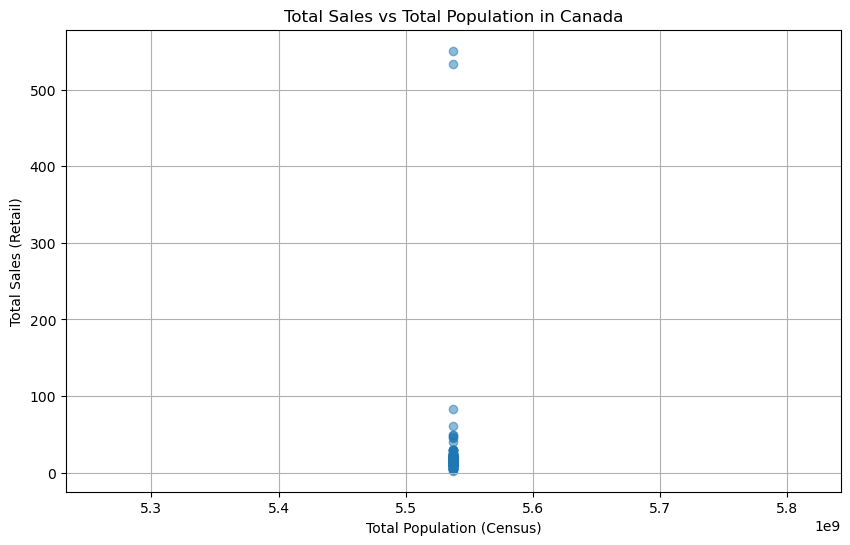

In [30]:
# Plot Total Sales vs Total Population
plt.figure(figsize=(10, 6))
plt.scatter(online_retail_canada['TotalPopulation'], online_retail_canada['TotalAmount'], alpha=0.5)
plt.title('Total Sales vs Total Population in Canada')
plt.xlabel('Total Population (Census)')
plt.ylabel('Total Sales (Retail)')
plt.grid(True)
plt.show()

### Explore Additional Demographic Factors
Since total population alone doesn’t show a strong relationship with sales, we’ll incorporate other demographic factors from the Census Data to better understand consumer behavior.

In [34]:
# Aggregate census data to get key metrics
census_agg = {
    'TotalPopulation': census_df.loc[census_df['Characteristic'] == 'Total - Private households by tenure - 25% sample data', 'Total'].values[0],
    'AverageIncome': census_df.loc[census_df['Characteristic'] == 'Average after-tax income in 2020 ($)', 'Men'].values[0],
    'RetailEmployment': census_df.loc[census_df['Characteristic'] == '44-45 Retail trade', 'Total'].values[0],
    'HouseholdOwnership': census_df.loc[census_df['Characteristic'] == 'Owner', 'Total'].values[0],
    'PublicTransitUsers': census_df.loc[census_df['Characteristic'] == 'Public transit', 'Total'].values[0],
    'WorkFromHome': census_df.loc[census_df['Characteristic'] == 'Worked at home', 'Total'].values[0],
}

# Add aggregated census data to the online retail data
for key, value in census_agg.items():
    online_retail_df[key] = value

# Display the updated data
print("Online Retail Data with Census Metrics:")
print(online_retail_df.head())

Online Retail Data with Census Metrics:
  InvoiceNo StockCode             Description  Quantity       InvoiceDate  \
0    541999     20717  STRAWBERRY SHOPPER BAG         1  2011-01-25 10:45   
1    543546     20717  STRAWBERRY SHOPPER BAG         1  2011-02-09 16:52   
2    544323     20717  STRAWBERRY SHOPPER BAG         1  2011-02-17 15:51   
3    544681     20717  STRAWBERRY SHOPPER BAG         1  2011-02-22 16:28   
4    544812     20717  STRAWBERRY SHOPPER BAG         1  2011-02-23 15:58   

   UnitPrice  CustomerID         Country  TotalAmount  TotalPopulation  \
0       2.46         NaN  United Kingdom         2.46       14978940.0   
1       2.46         NaN  United Kingdom         2.46       14978940.0   
2       2.46         NaN  United Kingdom         2.46       14978940.0   
3       2.46         NaN  United Kingdom         2.46       14978940.0   
4       2.46         NaN  United Kingdom         2.46       14978940.0   

       TotalMen    TotalWomen  AverageIncome  Retail

### Feature Engineering
We’ll create additional features to improve the predictive model.

In [38]:
# Ensure the InvoiceDate column is in datetime format
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'], errors='coerce')

In [39]:
# Define a reference date (e.g., maximum date in the dataset)
reference_date = online_retail_df['InvoiceDate'].max()

# Calculate the purchase duration in days
online_retail_df['PurchaseDuration'] = (reference_date - online_retail_df['InvoiceDate']).dt.days

# Display the updated DataFrame
print("Online Retail Data with Time-Based Features:")
print(online_retail_df[['InvoiceDate', 'PurchaseMonth', 'PurchaseYear', 'PurchaseDuration']].head())


Online Retail Data with Time-Based Features:
          InvoiceDate  PurchaseMonth  PurchaseYear  PurchaseDuration
0 2011-01-25 10:45:00              1          2011               318
1 2011-02-09 16:52:00              2          2011               302
2 2011-02-17 15:51:00              2          2011               294
3 2011-02-22 16:28:00              2          2011               289
4 2011-02-23 15:58:00              2          2011               288


### Demographic Features
Add demographic features from the census data

In [42]:
# Add demographic features
online_retail_df['IncomePerCapita'] = online_retail_df['AverageIncome'] / online_retail_df['TotalPopulation']
online_retail_df['RetailEmploymentRate'] = online_retail_df['RetailEmployment'] / online_retail_df['TotalPopulation']

# Display the updated data
print("Online Retail Data with Demographic Features:")
print(online_retail_df[['IncomePerCapita', 'RetailEmploymentRate']].head())

Online Retail Data with Demographic Features:
   IncomePerCapita  RetailEmploymentRate
0         0.002876              0.143511
1         0.002876              0.143511
2         0.002876              0.143511
3         0.002876              0.143511
4         0.002876              0.143511


### Build the Predictive Model
We’ll build a robust predictive model using multiple features from both datasets.

#### Define Features and Target
Use all relevant features to predict TotalAmount

In [43]:
# Define features (X) and target (y)
X = online_retail_df[['Quantity', 'UnitPrice', 'TotalPopulation', 'AverageIncome', 'RetailEmployment', 
                      'HouseholdOwnership', 'PublicTransitUsers', 'WorkFromHome', 'PurchaseMonth', 'PurchaseYear', 
                      'PurchaseDuration', 'IncomePerCapita', 'RetailEmploymentRate']]
y = online_retail_df['TotalAmount']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train and Evaluate the Model
Train a machine learning model (e.g., Random Forest Regressor) and evaluate its performance.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4500.12030252275
R-squared: 0.708643490071127


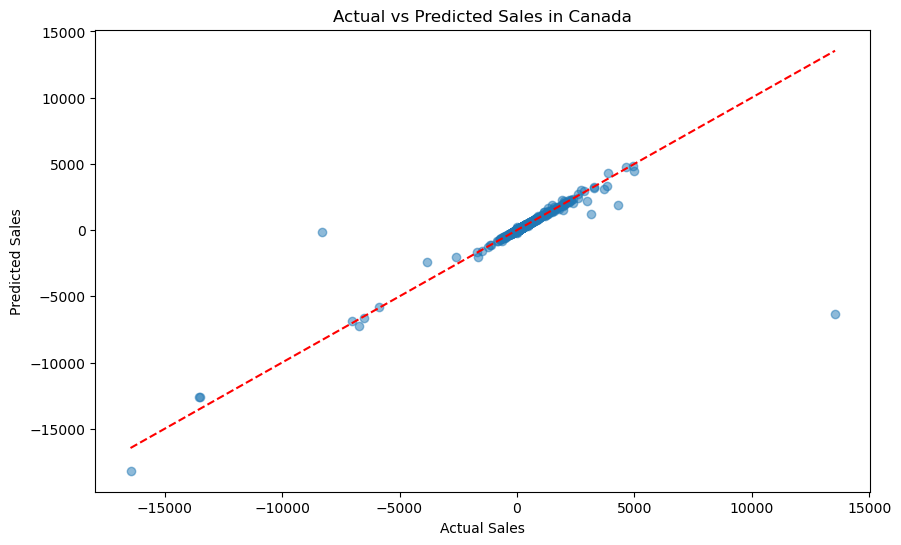

In [46]:
# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Sales in Canada')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [47]:
# Save the updated online retail data
online_retail_df.to_csv('Online_Retail_Canada_With_Census_Data.csv', index=False)

# Save the predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv('Predictions_with_Census_Data_Canada.csv', index=False)

#### Classification model that predicts whether a customer will make a purchase or not based on demographic and transactional features. 
1: Customer will make a purchase.

0: Customer will not make a purchase.

In [48]:
# Create the target variable
online_retail_df['WillBuy'] = (online_retail_df['TotalAmount'] > 0).astype(int)

# Display the updated data
print("Online Retail Data with Target Variable:")
print(online_retail_df[['TotalAmount', 'WillBuy']].head())

Online Retail Data with Target Variable:
   TotalAmount  WillBuy
0         2.46        1
1         2.46        1
2         2.46        1
3         2.46        1
4         2.46        1


In [49]:
# Define features (X) and target (y)
X = online_retail_df[['Quantity', 'UnitPrice', 'TotalPopulation', 'AverageIncome', 'RetailEmployment', 
                      'HouseholdOwnership', 'PublicTransitUsers', 'WorkFromHome', 'PurchaseMonth', 'PurchaseYear', 
                      'PurchaseDuration', 'IncomePerCapita', 'RetailEmploymentRate']]
y = online_retail_df['WillBuy']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2305
           1       1.00      1.00      1.00    105024

    accuracy                           1.00    107329
   macro avg       1.00      1.00      1.00    107329
weighted avg       1.00      1.00      1.00    107329

Confusion Matrix:
[[  2305      0]
 [     0 105024]]


### Testing the Model (Prediction)

In [52]:
# Create sample input data
sample_data = {
    'Quantity': [10, 5, 20],
    'UnitPrice': [5.0, 10.0, 2.5],
    'TotalPopulation': [14978940.0, 14978940.0, 14978940.0],
    'AverageIncome': [43080.0, 43080.0, 43080.0],
    'RetailEmployment': [2149640.0, 2149640.0, 2149640.0],
    'HouseholdOwnership': [9955975.0, 9955975.0, 9955975.0],
    'PublicTransitUsers': [1000510.0, 1000510.0, 1000510.0],
    'WorkFromHome': [4214860.0, 4214860.0, 4214860.0],
    'PurchaseMonth': [6, 12, 3],  # June, December, March
    'PurchaseYear': [2011, 2011, 2011],
    'PurchaseDuration': [30, 90, 15],  # Duration in days
    'IncomePerCapita': [43080.0 / 14978940.0, 43080.0 / 14978940.0, 43080.0 / 14978940.0],
    'RetailEmploymentRate': [2149640.0 / 14978940.0, 2149640.0 / 14978940.0, 2149640.0 / 14978940.0]
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# Display the sample input data
print("Sample Input Data for Predictions:")
print(sample_df)

Sample Input Data for Predictions:
   Quantity  UnitPrice  TotalPopulation  AverageIncome  RetailEmployment  \
0        10        5.0       14978940.0        43080.0         2149640.0   
1         5       10.0       14978940.0        43080.0         2149640.0   
2        20        2.5       14978940.0        43080.0         2149640.0   

   HouseholdOwnership  PublicTransitUsers  WorkFromHome  PurchaseMonth  \
0           9955975.0           1000510.0     4214860.0              6   
1           9955975.0           1000510.0     4214860.0             12   
2           9955975.0           1000510.0     4214860.0              3   

   PurchaseYear  PurchaseDuration  IncomePerCapita  RetailEmploymentRate  
0          2011                30         0.002876              0.143511  
1          2011                90         0.002876              0.143511  
2          2011                15         0.002876              0.143511  


In [53]:
# Make predictions using the trained classifier
sample_predictions = classifier.predict(sample_df)

# Add predictions to the sample DataFrame
sample_df['WillBuy'] = sample_predictions

# Display the predictions
print("Predictions for Sample Input Data:")
print(sample_df[['Quantity', 'UnitPrice', 'WillBuy']])

Predictions for Sample Input Data:
   Quantity  UnitPrice  WillBuy
0        10        5.0        1
1         5       10.0        1
2        20        2.5        1


In [55]:
# Create sample input data
sample_data = {
    'Quantity': [10, 5, 20],
    'UnitPrice': [5.0, 10.0, 2.5],
    'TotalPopulation': [14978940.0, 14978940.0, 14978940.0],
    'AverageIncome': [43080.0, 43080.0, 43080.0],
    'RetailEmployment': [2149640.0, 2149640.0, 2149640.0],
    'HouseholdOwnership': [9955975.0, 9955975.0, 9955975.0],
    'PublicTransitUsers': [1000510.0, 1000510.0, 1000510.0],
    'WorkFromHome': [4214860.0, 4214860.0, 4214860.0],
    'PurchaseMonth': [6, 12, 3],  # June, December, March
    'PurchaseYear': [2011, 2011, 2011],
    'PurchaseDuration': [30, 90, 15],  # Duration in days
    'IncomePerCapita': [43080.0 / 14978940.0, 43080.0 / 14978940.0, 43080.0 / 14978940.0],
    'RetailEmploymentRate': [2149640.0 / 14978940.0, 2149640.0 / 14978940.0, 2149640.0 / 14978940.0]
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# Display the sample input data
print("Sample Input Data for Predictions:")
print(sample_df)

Sample Input Data for Predictions:
   Quantity  UnitPrice  TotalPopulation  AverageIncome  RetailEmployment  \
0        10        5.0       14978940.0        43080.0         2149640.0   
1         5       10.0       14978940.0        43080.0         2149640.0   
2        20        2.5       14978940.0        43080.0         2149640.0   

   HouseholdOwnership  PublicTransitUsers  WorkFromHome  PurchaseMonth  \
0           9955975.0           1000510.0     4214860.0              6   
1           9955975.0           1000510.0     4214860.0             12   
2           9955975.0           1000510.0     4214860.0              3   

   PurchaseYear  PurchaseDuration  IncomePerCapita  RetailEmploymentRate  
0          2011                30         0.002876              0.143511  
1          2011                90         0.002876              0.143511  
2          2011                15         0.002876              0.143511  


In [56]:
# Make predictions using the trained model
sample_predictions = model.predict(sample_df)

# Add predictions to the sample DataFrame
sample_df['PredictedSales'] = sample_predictions

# Display the predictions
print("Predictions for Sample Input Data:")
print(sample_df[['Quantity', 'UnitPrice', 'PredictedSales']])

Predictions for Sample Input Data:
   Quantity  UnitPrice  PredictedSales
0        10        5.0          49.600
1         5       10.0          49.827
2        20        2.5          49.952
